# Analisando Assinantes da News Letters

##### Aplicamos a função de Autocorrelação nas vendas, no aumento e na aceleração das vendas diárias e vimos que havia uma correlação entre elas

#### Executamos uma técnica de normalização de time series para minimizar as frequências pela quantidade de dias de finais de semana de cada mês

#### Analisamos uma time series importando da biblioteca statsmodels.tsa.seasonal a função seasonal_decompose, que nos mostra o que é a nossa observação, tendência, sazonalidade e ruído de uma só vez

#### importando dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as py
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
assinantes = pd.read_csv('Dados/newsletter_alucar.csv')

In [3]:
assinantes.head(7)

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85


In [4]:
print('Quantidade de linhas e colunas', assinantes.shape)

Quantidade de linhas e colunas (24, 2)


In [5]:
print('A quantidade de dados nulos é {}'.format(assinantes.isna().sum().sum()))

A quantidade de dados nulos é 0


In [6]:
type(assinantes)

pandas.core.frame.DataFrame

In [7]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [8]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [9]:
assinantes['aumento'] = assinantes['assinantes'].diff()

In [10]:
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [11]:
assinantes.head(10)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


In [12]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data =dataset)
    ax=ax

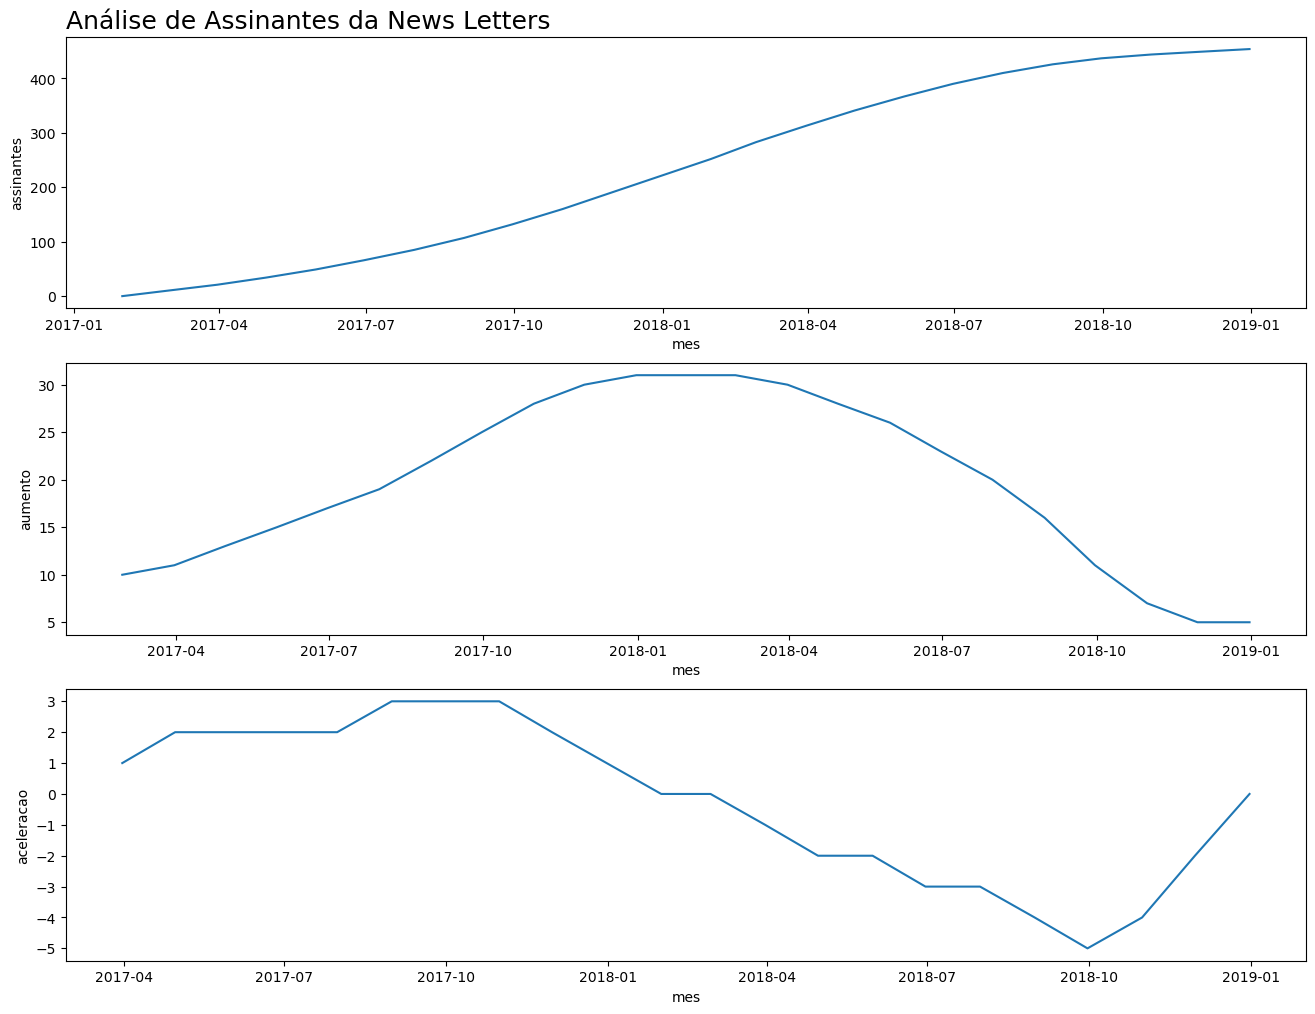

In [13]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de Assinantes da News Letters')

# Análise Chocolura

In [14]:
chocolura_dados = pd.read_csv('Dados/chocolura.csv')

In [15]:
chocolura_dados.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [16]:
chocolura_dados['mes']= pd.to_datetime(chocolura_dados['mes'])

In [17]:
chocolura_dados.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [18]:
print('Quantidade de linhas:', chocolura_dados.shape)
print('Quantidade de Dados nulos:', chocolura_dados.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de Dados nulos: 0


In [19]:
chocolura_dados['aumento'] = chocolura_dados['vendas'].diff()
chocolura_dados['aceleracao']= chocolura_dados['aumento'].diff()

In [20]:
chocolura_dados.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


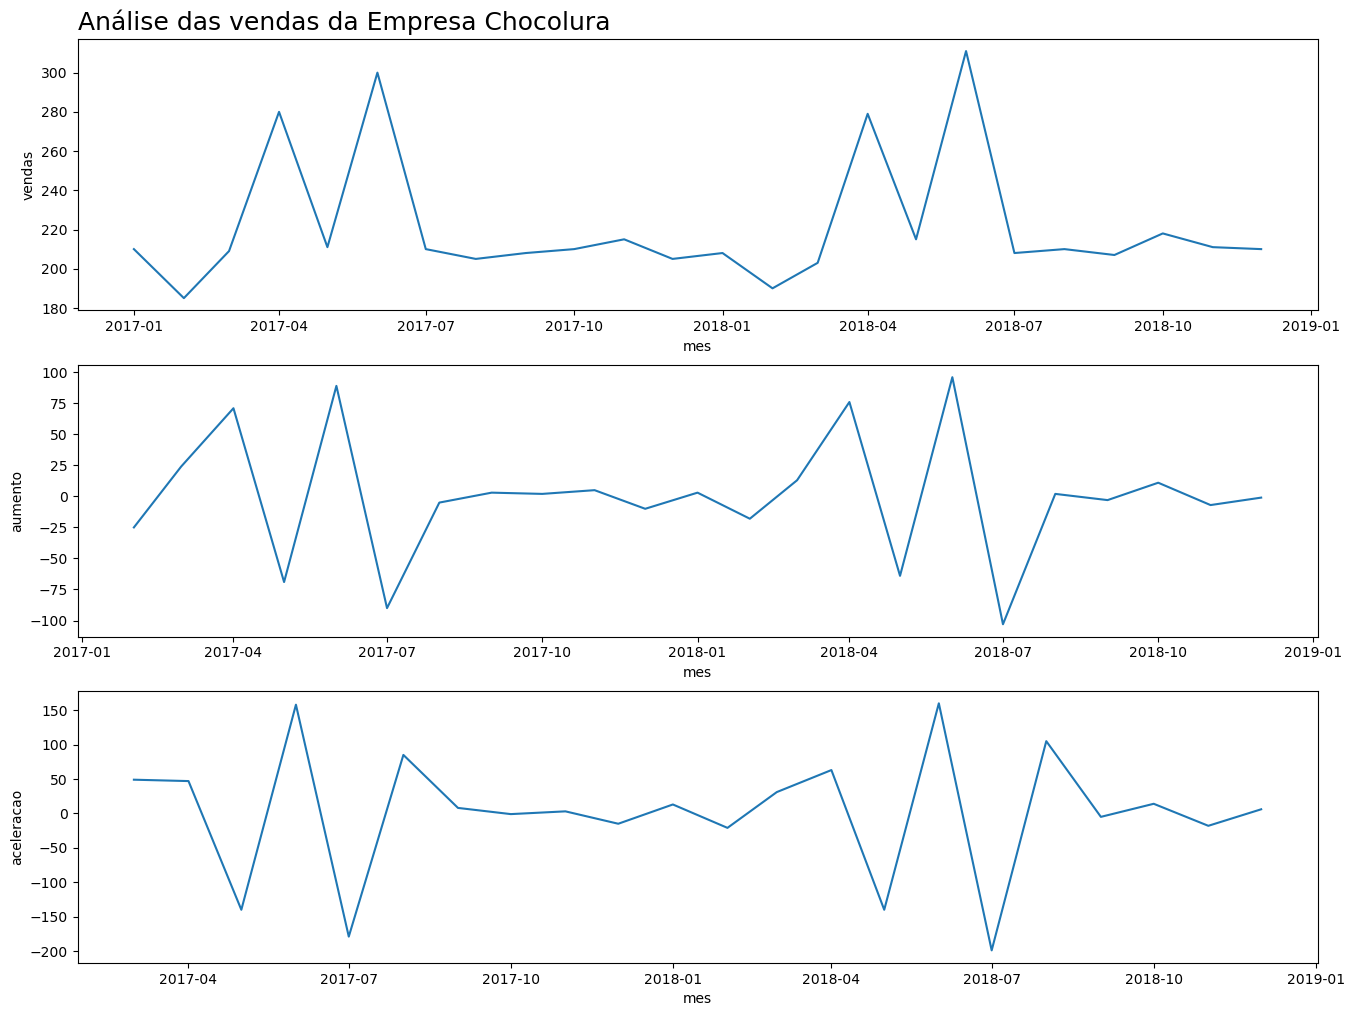

In [21]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura_dados, ('Análise das vendas da Empresa Chocolura'))
##A sazonalidade é um padrão repetitivo dentro de um determinado período fixo de tempo.
#Ou seja, sempre no mês 4 e no 6 a empresa venderá mais chocolate. Durante os demais meses, vende menos.



# Chocolura - Vendas(Outubro e Novembro)

In [22]:
vendasPerday_chocolura = pd.read_csv('Dados/chocolura_vendas_por_dia.csv')

In [23]:
vendasPerday_chocolura.head(5)

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [24]:
print('A quantidade de linhas e colunas, respectivamente é:' ,vendasPerday_chocolura.shape)

A quantidade de linhas e colunas, respectivamente é: (61, 2)


In [25]:
print('A quantidade de dados nulos é', vendasPerday_chocolura.isna().sum().sum())

A quantidade de dados nulos é 0


In [26]:
vendasPerday_chocolura['dia'] = pd.to_datetime(vendasPerday_chocolura['dia'])

In [27]:
vendasPerday_chocolura.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [28]:
vendasPerday_chocolura['aumento'] = vendasPerday_chocolura['vendas'].diff()
vendasPerday_chocolura['aceleracao'] = vendasPerday_chocolura['aumento'].diff()

In [29]:
vendasPerday_chocolura.head(4)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0


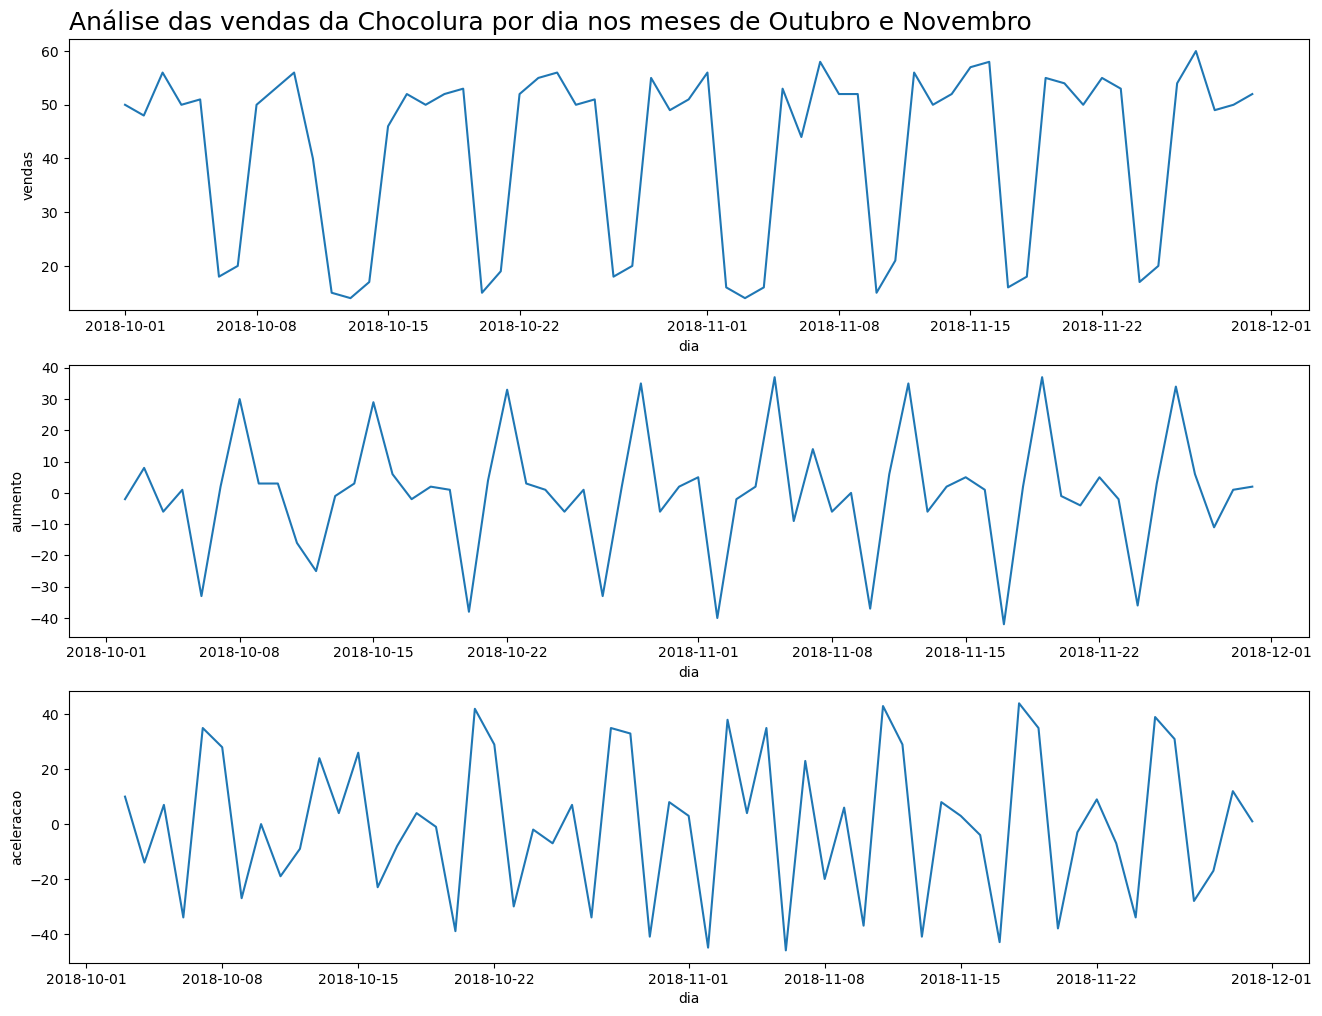

In [30]:
plot_comparacao('dia', 'vendas','aumento', 'aceleracao', vendasPerday_chocolura, 'Análise das vendas da Chocolura por dia nos meses de Outubro e Novembro')

In [31]:
def plot_barra_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.barplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.barplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.barplot(x=x, y=y3, data =dataset)
    ax=ax

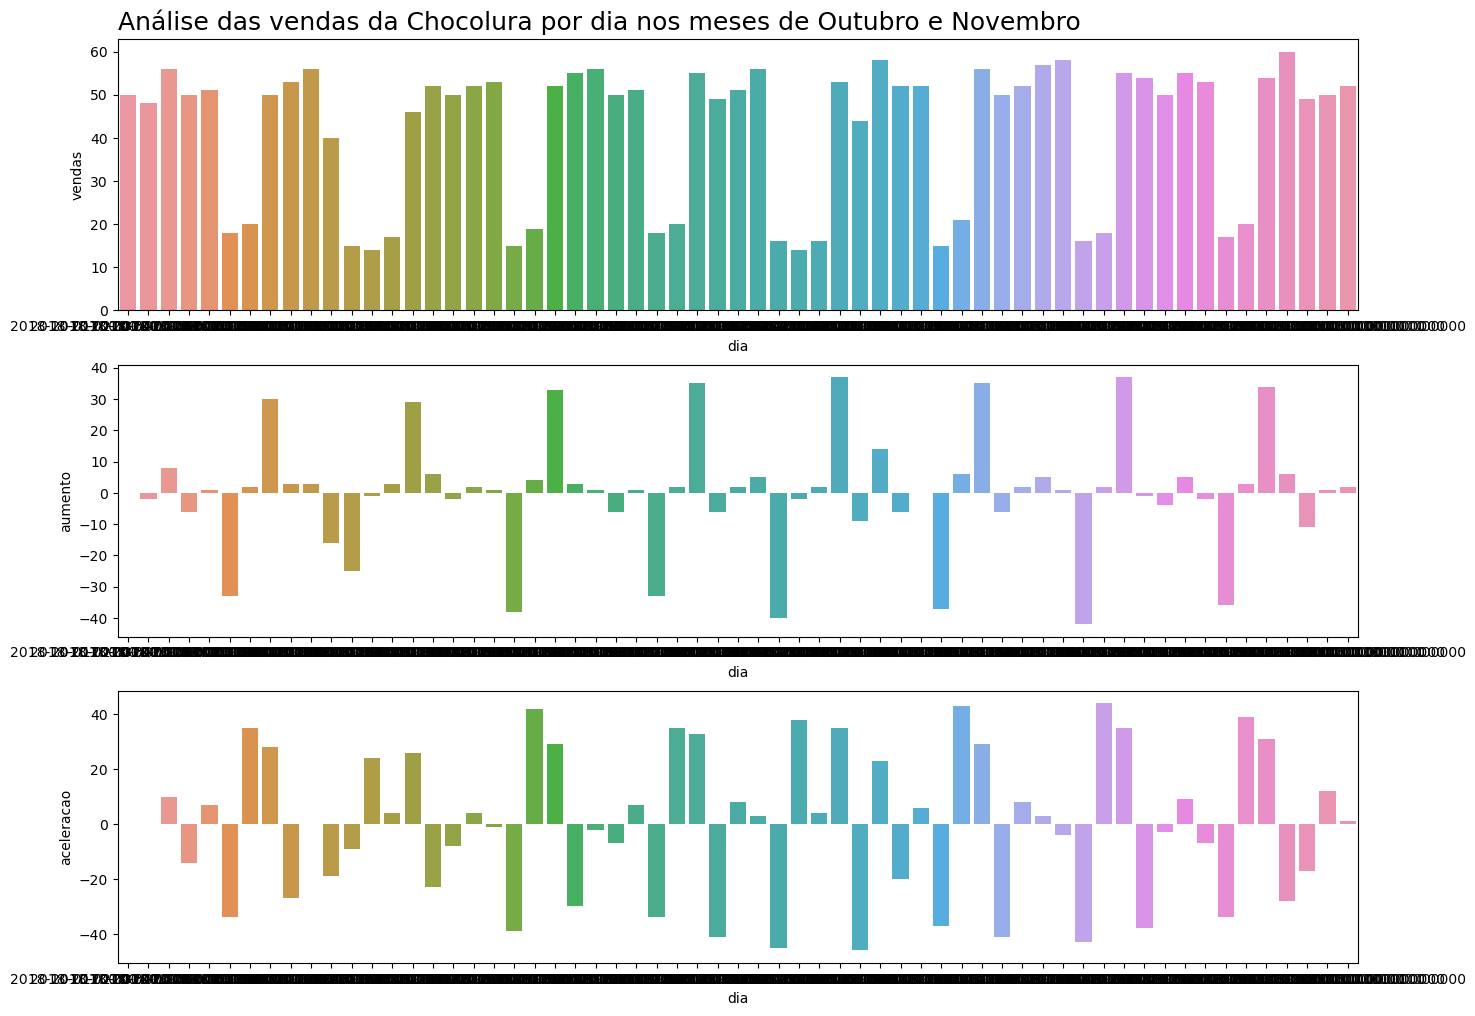

In [32]:
plot_barra_comparacao('dia', 'vendas','aumento', 'aceleracao', vendasPerday_chocolura, 'Análise das vendas da Chocolura por dia nos meses de Outubro e Novembro')

In [33]:
vendasPerday_chocolura['dias_da_semana'] = vendasPerday_chocolura['dia'].dt.day_name()

In [34]:
vendasPerday_chocolura.head(7)
vendasPerday_chocolura['dias_da_semana'].unique()


array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [35]:
dias_traduzidos = {'Monday':'segunda', 'Tuesday':'terca', 'Wednesday':'quarta', 'Thursday':'quinta',
                   'Friday':'sexta', 'Saturday':'sabado', 'Sunday':'domingo'}

In [36]:
vendasPerday_chocolura['dias_da_semana'] = vendasPerday_chocolura['dias_da_semana'].map(dias_traduzidos)

In [37]:
vendasPerday_chocolura.head(7)

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terca
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo


### Agrupando por dia

In [38]:
vendas_agrupadas = vendasPerday_chocolura.groupby('dias_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/tmp/ipykernel_45275/3895495754.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendasPerday_chocolura.groupby('dias_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [39]:
vendas_agrupadas.head(10)

,vendas,aumento,aceleracao
dias_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terca,52.0,-1.0,-34.0


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

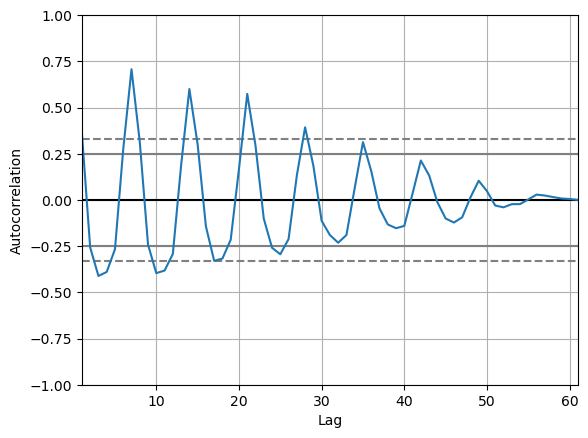

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(vendasPerday_chocolura.vendas)

** Correlação das vendas diárias**

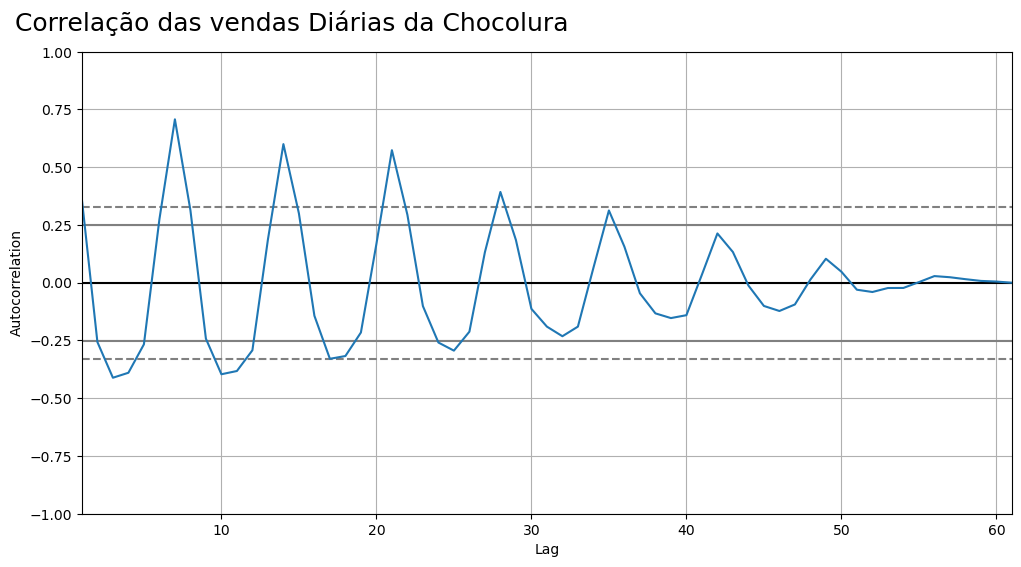

In [41]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas Diárias da Chocolura', fontsize = 18, x= 0.3,  y = 0.95)
autocorrelation_plot(vendasPerday_chocolura['vendas'])
ax=ax


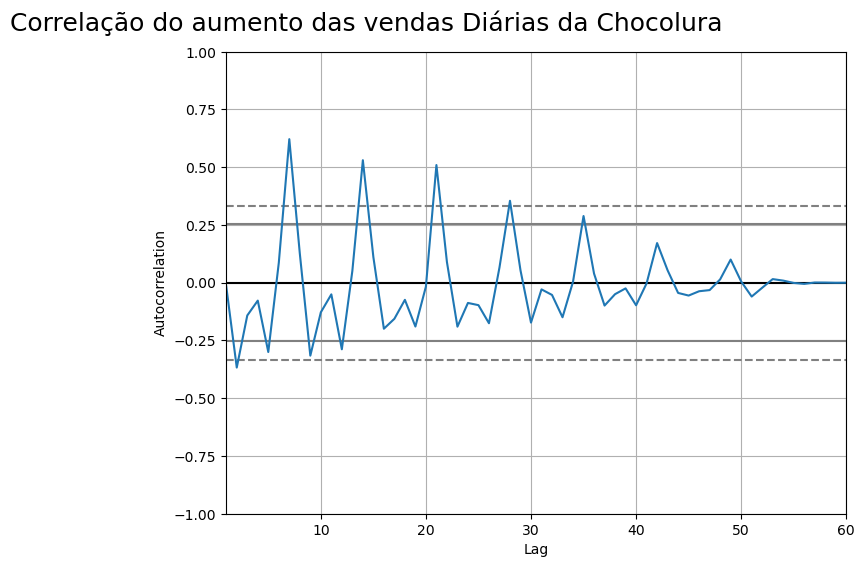

In [42]:
ax = plt.figure(figsize = (8,6))
ax.suptitle('Correlação do aumento das vendas Diárias da Chocolura', fontsize = 18, x= 0.3,  y = 0.95)
autocorrelation_plot(vendasPerday_chocolura['aumento'][1:])
ax=ax

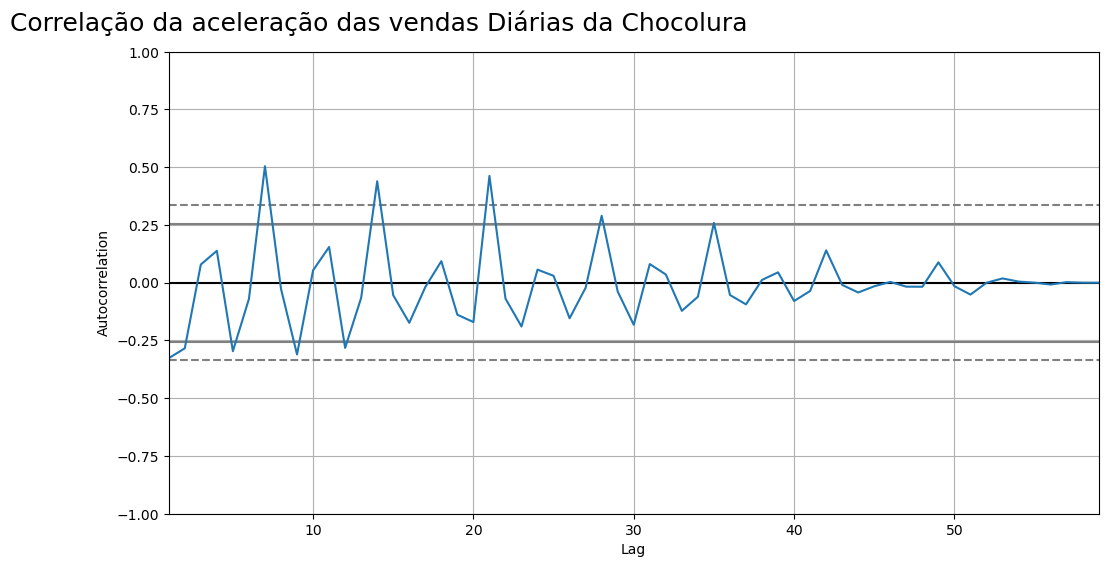

In [43]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da aceleração das vendas Diárias da Chocolura', fontsize = 18, x= 0.3,  y = 0.95)
autocorrelation_plot(vendasPerday_chocolura['aceleracao'][2:])
ax=ax

# Cafelura Análise de Vendas

In [44]:
cafelura_data = pd.read_csv('Dados/cafelura.csv')

In [45]:
cafelura_data.head(12)

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670
5,2017-06-30,7380
6,2017-07-31,8096
7,2017-08-31,12390
8,2017-09-30,11792
9,2017-10-31,13984


In [46]:
print( 'A quantidade de dados nulos é: ', cafelura_data.isna().sum().sum())


A quantidade de dados nulos é:  0


In [47]:
print('A quantidade de linhas e colunas é:', cafelura_data.shape, 'respectivamente.')

A quantidade de linhas e colunas é: (24, 2) respectivamente.


In [48]:
cafelura_data['mes'] = pd.to_datetime(cafelura_data['mes'])

In [49]:
cafelura_data.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [50]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y =y , data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title('Vendas da cafelura de 2017 e 2018')
    ax.set_xlabel(labelx, fontsize = '14')
    ax.set_ylabel(labely, fontsize = '14')
    ax=ax

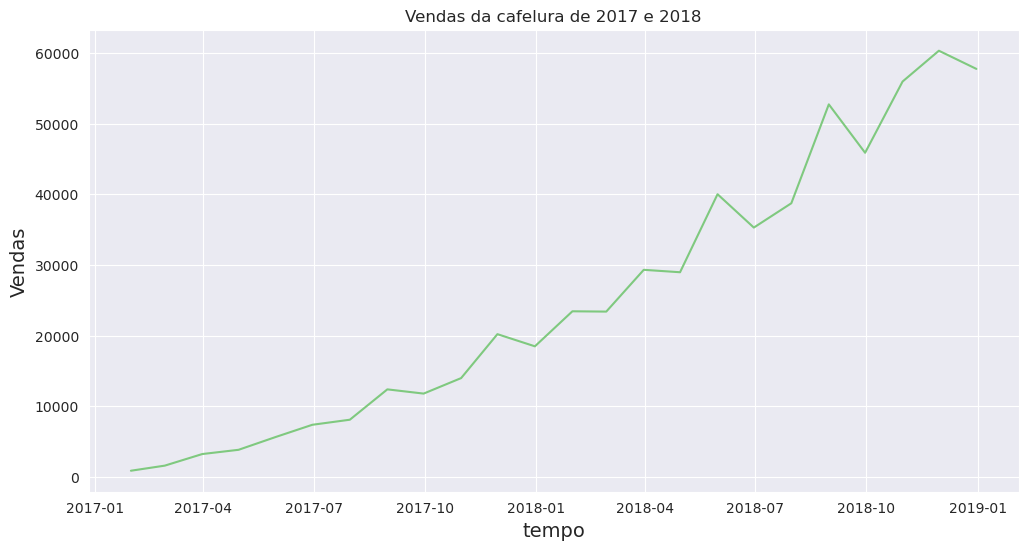

In [51]:
plotar('Vendas da cafelura de 2017 e 2018', 'tempo', 'Vendas', 'mes', 'vendas', cafelura_data)

In [52]:
## no gráfico acima, identifiquei que podem ver algumas viés de informação, afinal, em todos esses períodos houveram finais de semana,
## entao vou adicionar agora um arquivo que contém corretamente os dados referente aos finais de semana

In [53]:
dias_fds = pd.read_csv('Dados/dias_final_de_semana.csv')

In [54]:
dias_fds.head(10)

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [55]:
print( 'A quantidade de dados nulos é: ', dias_fds.isna().sum().sum())
print('A quantidade de linhas e colunas é:', dias_fds.shape, 'respectivamente.')


A quantidade de dados nulos é:  0
A quantidade de linhas e colunas é: (24, 1) respectivamente.


In [56]:
dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [57]:
cafelura_data['vendas_normalizadas'] = cafelura_data['vendas'] / dias_fds['quantidade_de_dias'].values

In [58]:
cafelura_data.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


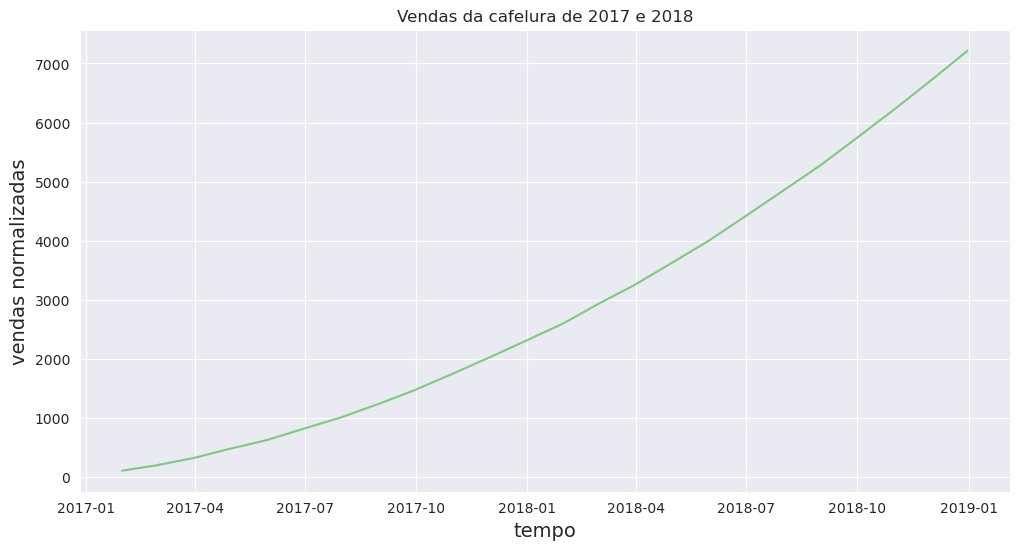

In [59]:
plotar('Vendas Normalizadas da Cafelura 2017 e 2018', 'tempo', 'vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura_data)

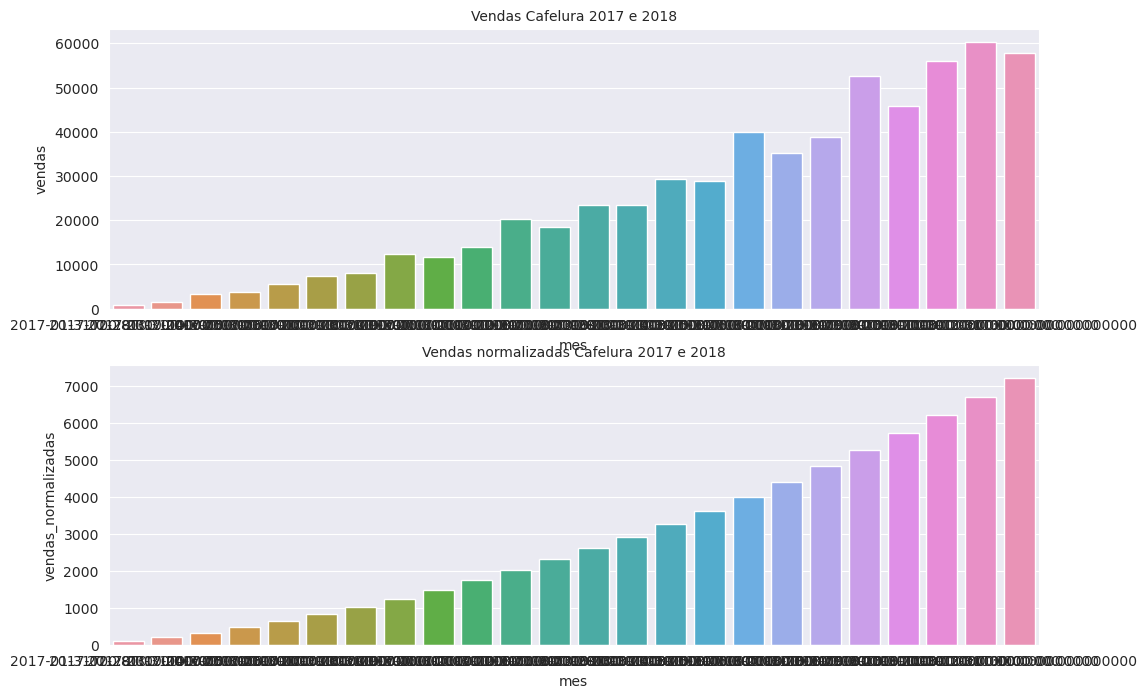

In [60]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=10)
sns.barplot(x='mes', y='vendas', data=cafelura_data)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=10)
sns.barplot(x='mes', y='vendas_normalizadas', data=cafelura_data)
ax=ax 

# StatsModel

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

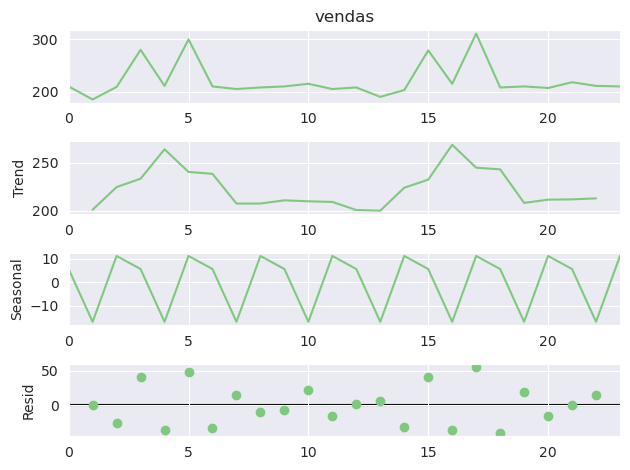

In [62]:
resultado = seasonal_decompose(chocolura_dados['vendas'],  period=3,)
ax = resultado.plot()

In [63]:
observacao  = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [64]:
data =({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})
resultado = pd.DataFrame(data)
resultado = resultado.fillna(0)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,0.000000,5.603175,0.000000
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


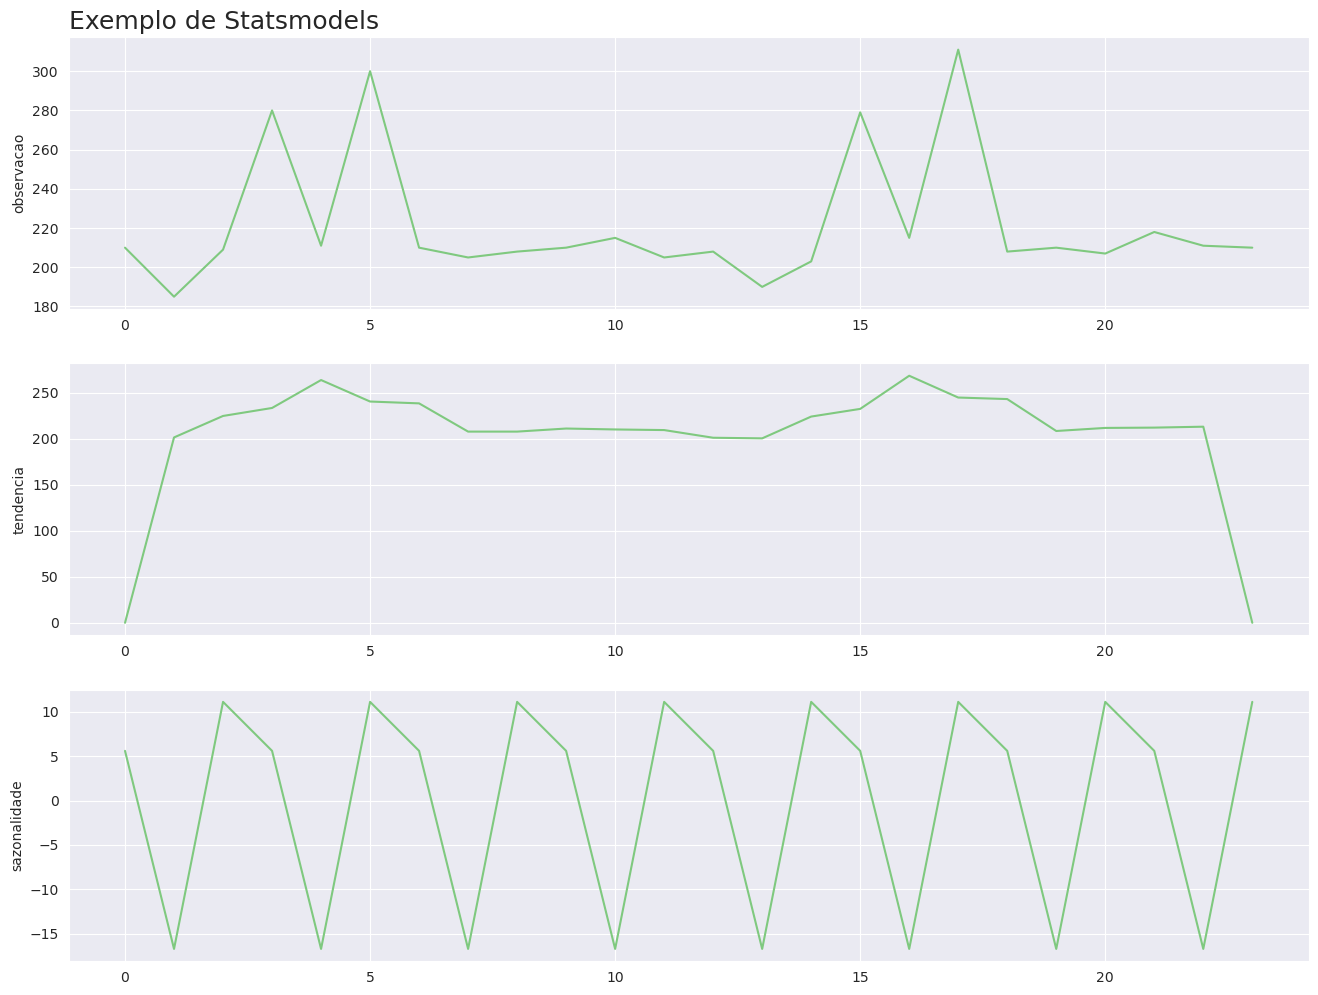

In [65]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

## alucel - analise de vendas

In [68]:
alucel_dados = pd.read_csv('Dados/alucel.csv')

In [69]:
alucel_dados.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [72]:
print('a quantidade de dados nulos é: {}'.format(alucel_dados.isna().sum().sum()))

a quantidade de dados nulos é: 0


In [86]:
print('linhas e colunas, respectivamente',alucel_dados.shape)

linhas e colunas, respectivamente (61, 2)


In [88]:
alucel_dados['dia'] = pd.to_datetime(alucel_dados['dia'])

In [89]:
alucel_dados.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [93]:
alucel_dados['aumento'] = alucel_dados['vendas'].diff()
alucel_dados['aceleracao'] = alucel_dados['aumento'].diff()

In [95]:
alucel_dados.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


In [97]:
alucel_dados.fillna(0)


,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,0.00,0.00
1,2018-10-02,2185.69,810.86,0.00
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51
...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84
57,2018-11-27,22984.56,12211.03,13937.49
58,2018-11-28,9216.26,-13768.30,-25979.33
59,2018-11-29,12147.61,2931.35,16699.65


In [98]:
print('dados nulos:', alucel_dados.isna().sum().sum())

dados nulos: 3


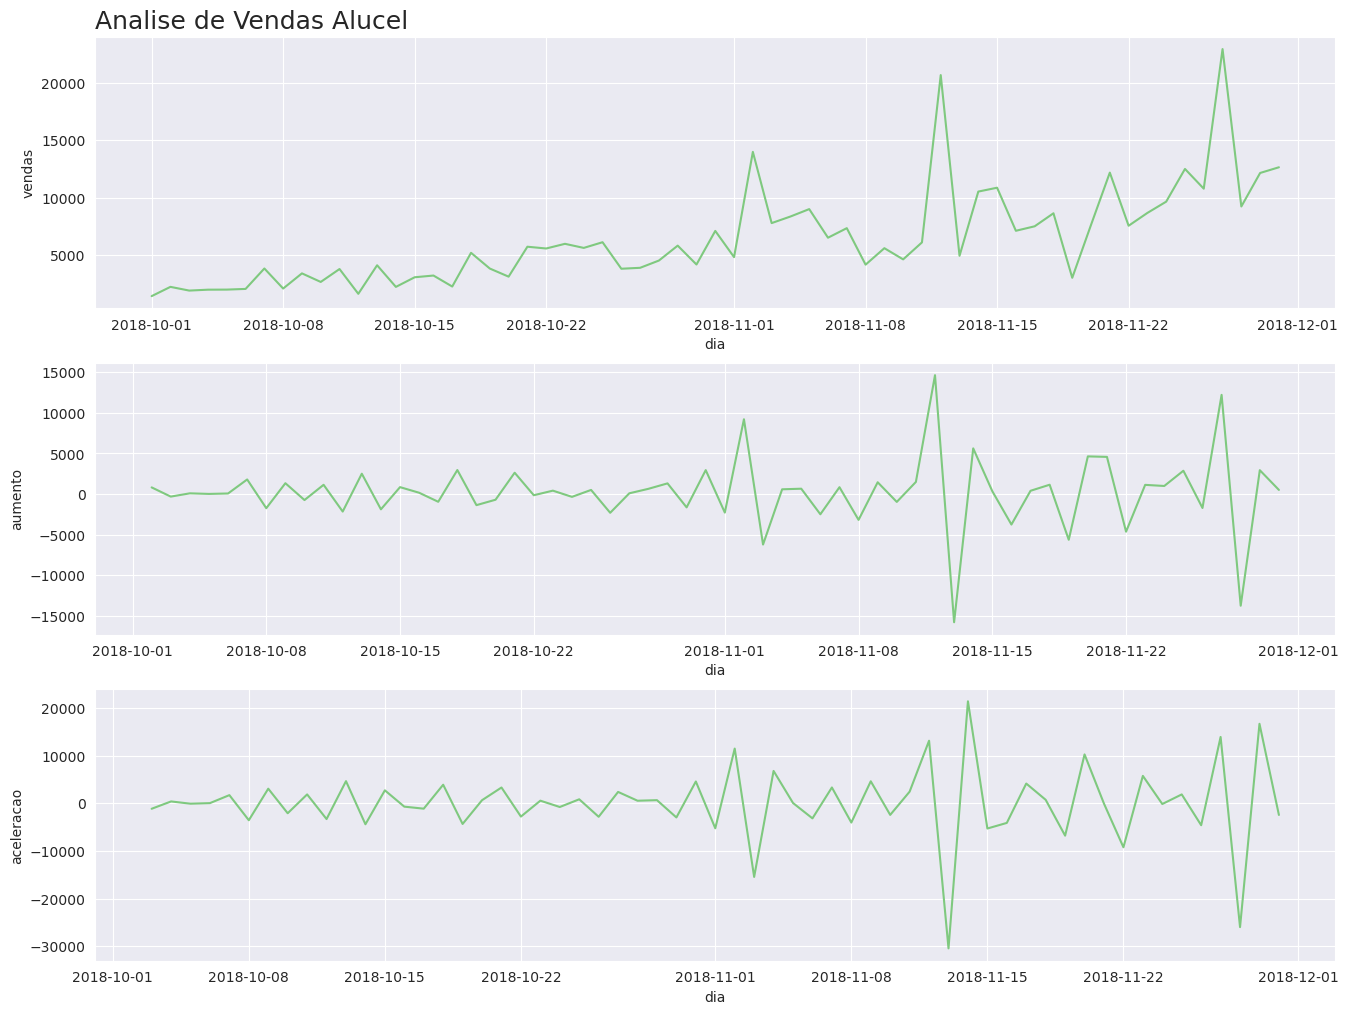

In [104]:
plot_comparacao('dia','vendas','aumento','aceleracao',alucel_dados, 'Analise de Vendas Alucel')

   
 ### Média Movel
    

In [114]:
alucel_dados['mediamovel'] = alucel_dados['vendas'].rolling(7).mean()

In [115]:
alucel_dados.head(7)

,dia,vendas,aumento,aceleracao,media-movel,mediamovel
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,2157.861429


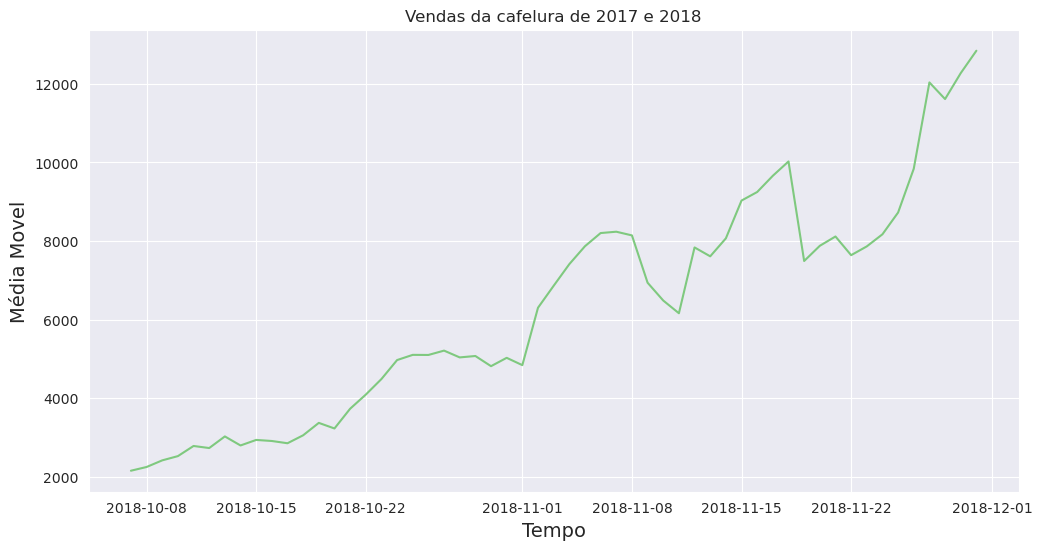

In [123]:
plotar('Analise das vendas com media movel de 7 dias','Tempo','Média Movel','dia','media-movel', alucel_dados)

In [131]:
alucel_dados['mediamovel21'] = alucel_dados['vendas'].rolling(21).mean()
alucel_dados.head()

,dia,vendas,aumento,aceleracao,media-movel,mediamovel,mediamovel_21,mediamovel21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN,NaN,NaN


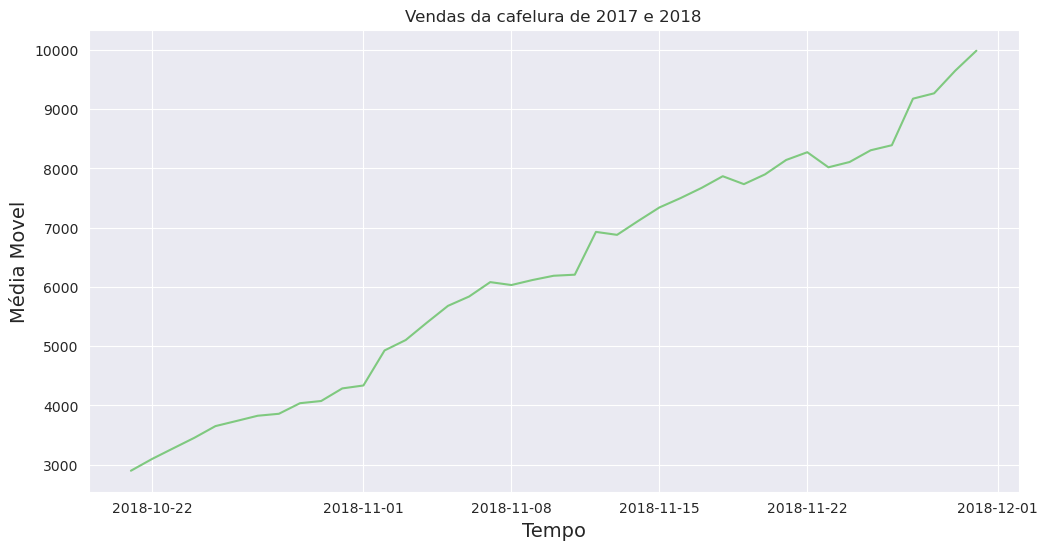

In [132]:
plotar('Analise das vendas com media movel de 7 dias','Tempo','Média Movel','dia','mediamovel21', alucel_dados)

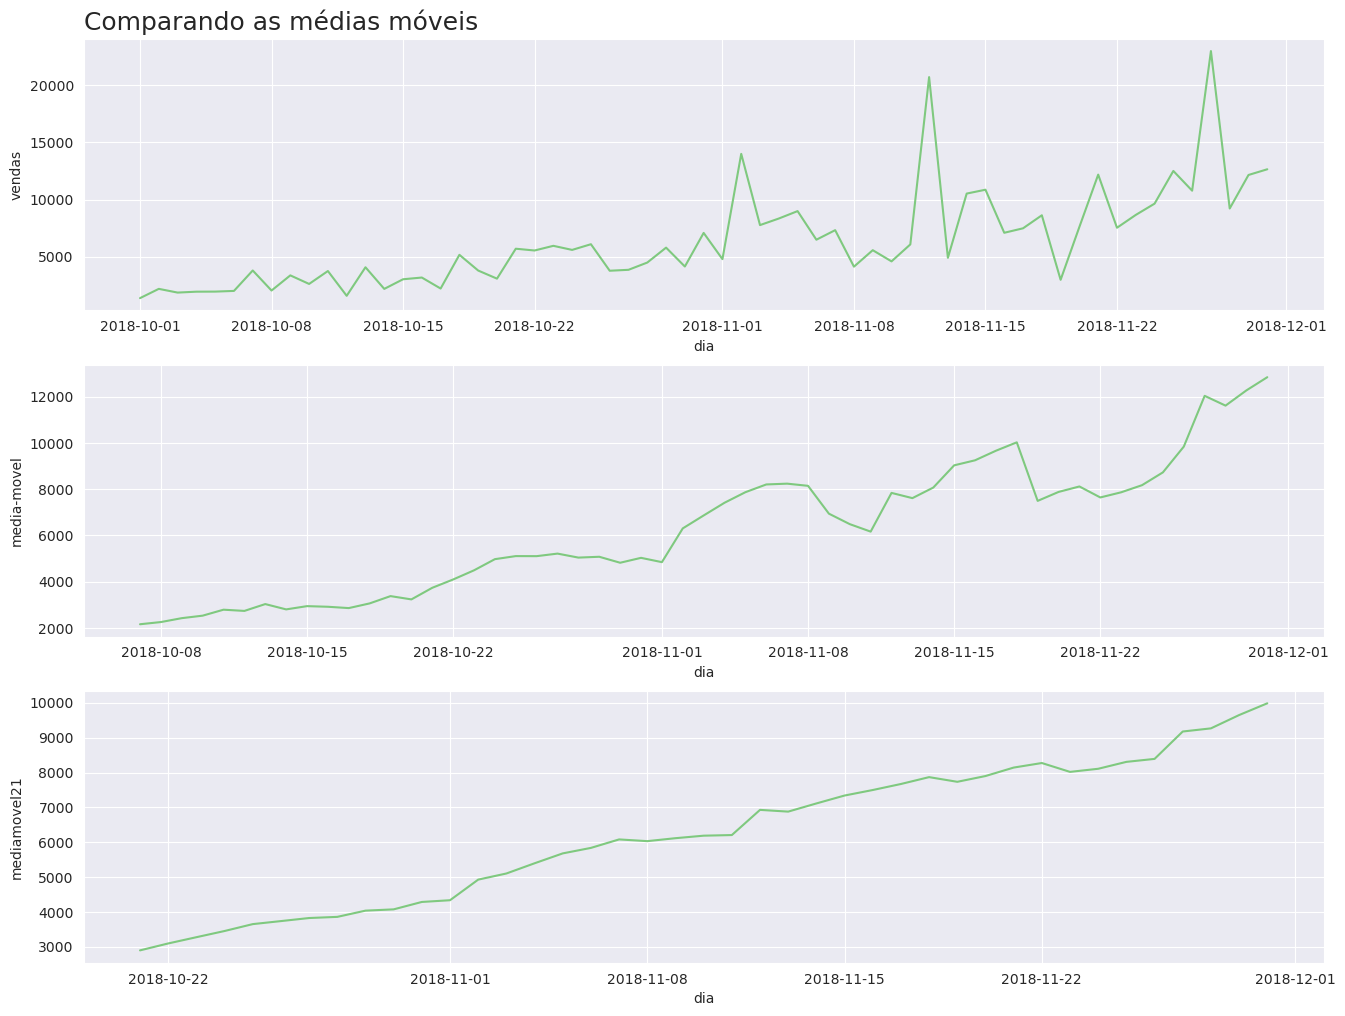

In [133]:
plot_comparacao('dia', 'vendas', 'media-movel', 'mediamovel21', alucel_dados, 'Comparando as médias móveis')